<a href="https://colab.research.google.com/github/Keren-Neeq/DS4A-Team1/blob/main/notebooks/Team1_ExtendedEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Remote Work Is Transforming America's Geographical Landscape
Team #1 | Ashek Ag Mohamed, Caprina Beal, Nzinga Eduardo Rodriguez, Keren Osabutey, Erika Smith

## Business Problem
### Overview

One of the most significant impacts of the Covid-19 pandemic may be a shift in how the workplace and workforce operate in the future. According to Forbes, approximately 5% of white-collar employees in the U.S. worked primarily from home before the outbreak. This figure skyrocketed to 71% during the pandemic. If given a choice to continue working from home post-pandemic, 54% of these workers indicated they would continue to do so, according to Pew Research Center. These figures will likely vary across occupations, industries, income, and education levels. As remote work becomes more popular, white-collar workers are likely to relocate from city centers to suburban areas, accelerating and changing geographic trends.

A report by the Economic Innovation Group (EIG) indicated that more than two-thirds of large urban counties saw their populations decline. Marking the first time in 50 years, counties with a population over 250,000  experienced negative growth. Although migration patterns had been in effect before Covid-19, the explosion of remote work during the pandemic, reductions in births, rising deaths, and delayed immigration accelerated the shift. EIG indicated other contributing factors, including high median home and apartment rental prices, low housing inventory, and increasing costs of consumer goods such as gas. 

Using data curated from Glassdoor, Zillow, the U.S. Department of Housing, the U.S. Bureau of Labor Statistics, and the U.S. Census Bureau, our analysis will answer the following:


1.   Which cities had the work from home populations?
2.   Which states had the highest work from home populations?
3.   How have city growth rates changed, and how is the population shifting?
5.   How have the average single family home, and apartment rent prices changed over time?
6. Has the inflation rate affected housing inventory? 
7. How has the cost of consumer goods changed?



## Import Libraries and Data

In [2]:
!pip install plotly==5.11.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 34.6 MB/s eta 0:00:00


In [3]:
import os
import re
import io
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from functools import reduce 
from google.colab import files

sys.path.insert(0, "../utils")
warnings.filterwarnings('ignore')
sns.set(context='talk',style = 'whitegrid')
%matplotlib inline

## Download Data

In [8]:
# Upload File From Computer
uploaded = files.upload()

Saving Inflation by City.csv to Inflation by City.csv


In [ ]:
# Department of Housing Avg. Rent Prices
hud_df = pd.read_csv(io.BytesIO(uploaded['hud_final.csv']), parse_dates=["Year"])

In [ ]:
# U.S. Census Bureau Household Pulse Survey
tw_df = pd.read_csv(io.BytesIO(uploaded['teleworked_covid.csv']), parse_dates=["Date"])

In [ ]:
population_df = pd.read_csv(io.BytesIO(uploaded['mobility_df.csv']))

In [ ]:
#annual inflation rates by city
inflation_df = pd.read_csv(io.BytesIO(uploaded['Annual Inflation Rates.csv']))

In [5]:
# Zillow homes inventory
df_iv = pd.read_csv(io.BytesIO(uploaded['Metro_invt_fs_uc_sfrcondo_month.csv']))

In [7]:
# Zillow homes sale price
df_sp = pd.read_csv(io.BytesIO(uploaded['Metro_median_sale_price_uc_sfrcondo_month.csv']))

In [9]:
# Inflation by City - Sent by Caprina
df_infc = pd.read_csv(io.BytesIO(uploaded['Inflation by City.csv']))

## Data Insights

### 1.   Which cities had the highest work from home populations? 

In [ ]:
metro_areas = tw_df[tw_df['Area'].str.contains('Metro Area')]
metro_areas = metro_areas.groupby('Area')['Number', 'MOE', 'Percent', 'Percent MOE'].mean()
metro_areas.reset_index(inplace=True)
metro_areas['Number'] = metro_areas['Number'].apply(lambda x: "{:f}".format(x))
metro_areas['Number'] = metro_areas['Number'].astype('float')
metro_areas['Area'] = metro_areas['Area'].str.split(" Metro", expand=True)[0]
metro_areas = metro_areas.round(2)

In [ ]:
metro_areas.sort_values(by=['Percent'], ascending=True, inplace=True)

fig = px.bar(metro_areas, 
             x="Percent", 
             y="Area",
             error_x="Percent MOE",
             custom_data=["Percent MOE"],
             labels={'Area': 'U.S. Metro Area', 
                     "Percent": "Working From Home During the Pandemic"},
             orientation='h')

fig.update_traces(hovertemplate=
                  "<b>%{y}</b><br><br>" +
                  "Working From Home: %{x}" 
                  "<extra></extra>",
                  marker_color='rgb(158,202,225)', 
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5,
                  opacity=0.6
                  )

fig.update_layout(
    title=dict(
        text="U.S. cities with highest percentage of households where at least one adult has worked from home due to COVID-19",
        x=0.5,
        y=0.95,
        xanchor="center",
        yanchor="top"
    ),
    hoverlabel=dict(
        font_size=16,
        font_family="Rockwell"
    ),
    xaxis_ticksuffix="%"
    
)
fig.show()

##### *D.C., San Francisco, Boston, and Seattle Metro Areas had highest percentage of household that working from home during COVID-19 pandemic*

The Washington-Arlington-Alexandria, San Francisco-Oakland-Berkeley, and Boston-Cambridge-Newton metro areas had the highest percentage of households working from home throughout the COVID-19 pandemic where approximately 47%, 44%, and 42% of households had at least one adult 18 years or older working completely from home. 

### 2.   Which states had the highest work from home populations? 

In [ ]:
states = tw_df[~(tw_df['Area'].str.contains('Metro Area') | tw_df['Area'].str.contains('United States'))]
states = states.groupby('Area')['Number', 'MOE', 
                                'Percent', 'Percent MOE'].mean()
states.reset_index(inplace=True)
states['Number'] = states['Number'].apply(lambda x: "{:f}".format(x))
states['Number'] = states['Number'].astype('float')
states = states.round(2)

top_states = states.head(10)
top_states.sort_values(by=['Percent'], ascending=True, inplace=True)

In [ ]:
fig = px.bar(top_states, 
             x="Percent", 
             y="Area",
             error_x="Percent MOE",
             custom_data=["Percent MOE"],
             labels={'Area': 'State', 
                     "Percent": "Working From Home During the Pandemic"},
             orientation='h')

fig.update_traces(hovertemplate=
                  "<b>%{y}</b><br><br>" +
                  "Working From Home: %{x}" 
                  "<extra></extra>",
                  marker_color='rgb(158,202,225)', 
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5,
                  opacity=0.6
                  )

fig.update_layout(
    title=dict(
        text="States with highest percentage of households where at least one adult has worked from home due to COVID-19",
        x=0.5,
        y=0.95,
        xanchor="center",
        yanchor="top"
    ),
    hoverlabel=dict(
        font_size=16,
        font_family="Rockwell"
    ),
    xaxis_ticksuffix="%"
    
)
fig.show()

##### *D.C., Colorado, and California  had highest percentage of households that working from home during COVID-19 pandemic*

Approximately 56% of households in Washington, D.C., 33%, and 30% of households in Colorado and California reported that at least one person 18 years or older worked from home throughout the pandemic. Although Colorado had the second highest percentage of households working from home, its metro areas were part of the top 15 metro areas with the highest percentage of households working from home.

### 3.   How have city growth rates changed and how is the population shifting? 

In [ ]:
population_df= population_df.set_index('CITY')
#Splitting the df into two to get clearer plots
population1 = population_df.head()
population2 = population_df.tail()
#Seperated Nashville since its values were very small compared to the rest
nashville = population_df.iloc[[4]]

Text(0.5, 1.0, 'Population That Moved Into the Cities From Different States')

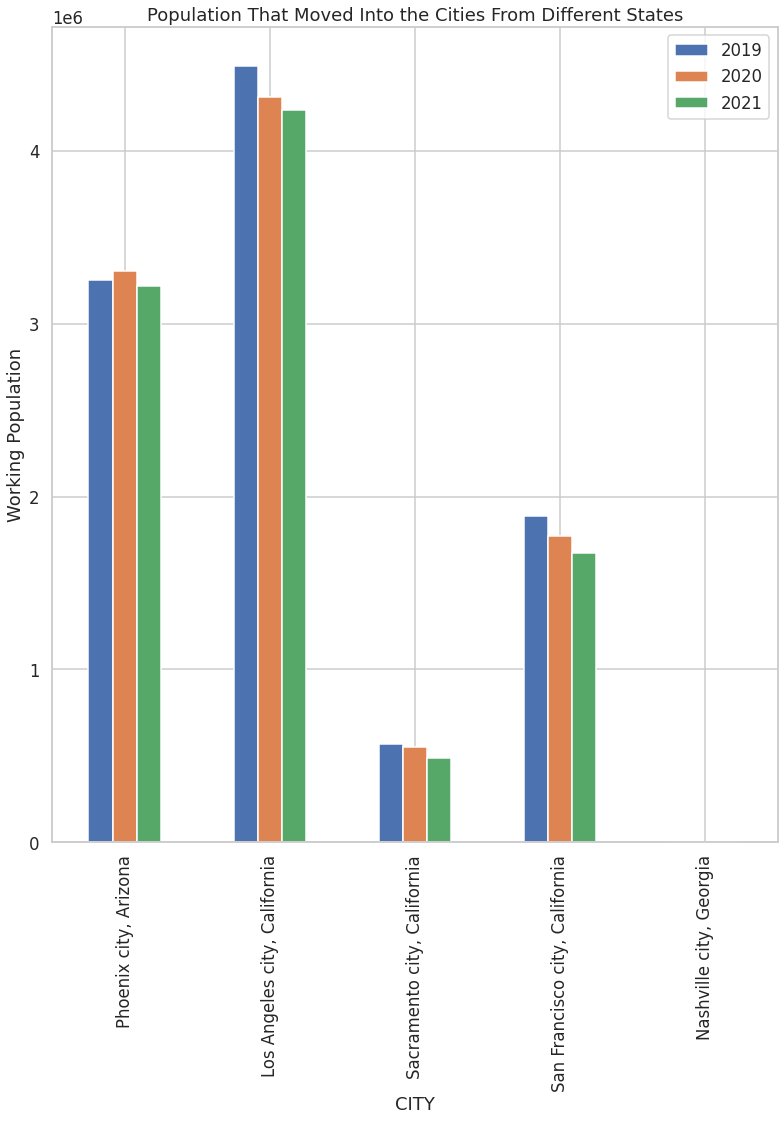

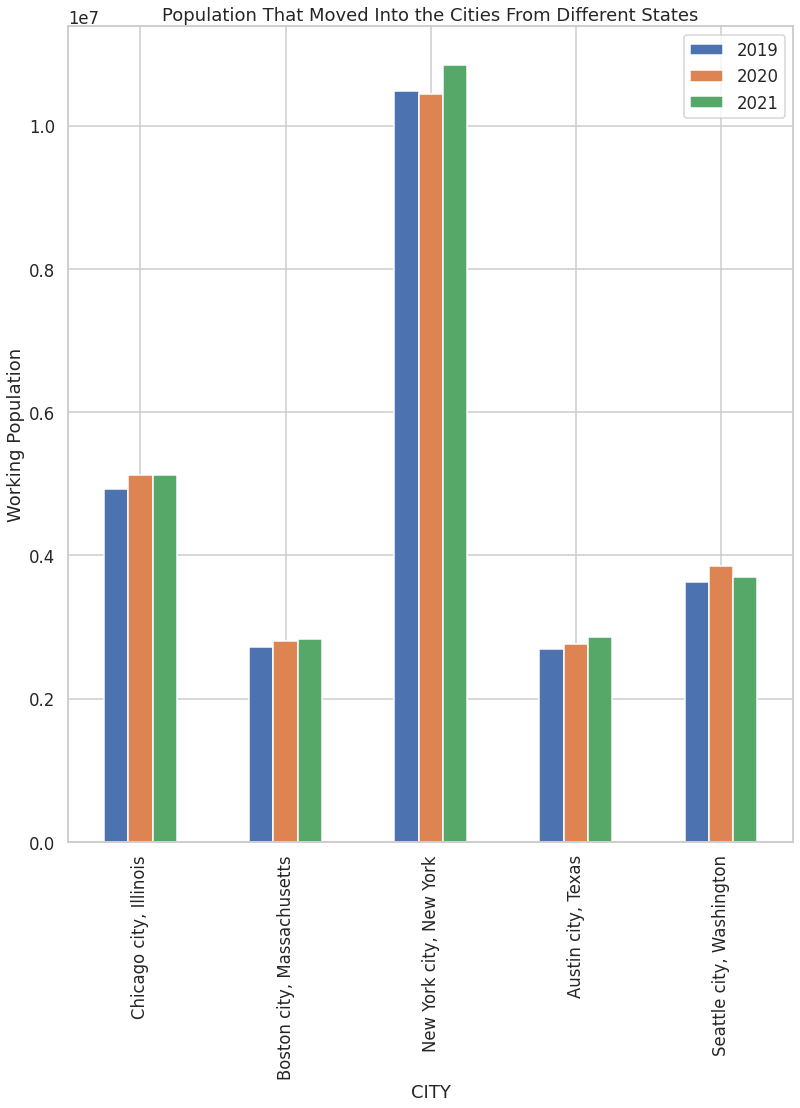

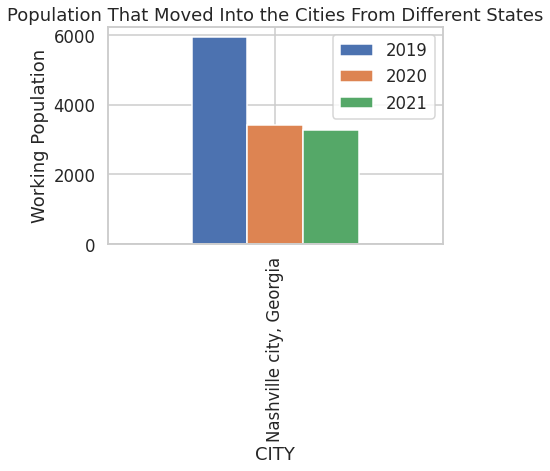

In [ ]:
#plotting two bar graphs of the cities against  the population of working age ie 18-64 that moved into the cities from different states

population1.plot.bar(xlabel='CITY', ylabel= 'Working Population',figsize=(13,15))
plt.title('Population That Moved Into the Cities From Different States')

population2.plot.bar(xlabel='CITY', ylabel= 'Working Population',figsize=(13,15))
plt.title('Population That Moved Into the Cities From Different States')

#plotting a seperate graph tof nashville to clearly see its figures
nashville.plot.bar(xlabel='CITY', ylabel= 'Working Population')
plt.title('Population That Moved Into the Nashville From Different States')


In [ ]:
#calculating percentage differences in population change
#calculating percentage changes across each year.
mobility = pd.DataFrame()
mobility['2020'] = ((population_df['2020']-population_df['2019'])/population_df['2019'])*100
mobility['2021'] = ((population_df['2021']-population_df['2020'])/population_df['2020'])*100
mobility

,2020,2021
CITY,,
"Phoenix city, Arizona",1.562003,-2.605807
"Los Angeles city, California",-3.953127,-1.835348
"Sacramento city, California",-2.514745,-11.473356
"San Francisco city, California",-6.147702,-5.476081
"Nashville city, Georgia",-42.484012,-4.368563
"Chicago city, Illinois",3.994749,-0.109927
"Boston city, Massachusetts",2.902468,0.883586
"New York city, New York",-0.390576,3.862918
"Austin city, Texas",2.387428,3.787197


Text(0.5, 1.0, 'Percentage Differences in Population That Moved Into the Cities From Different States')

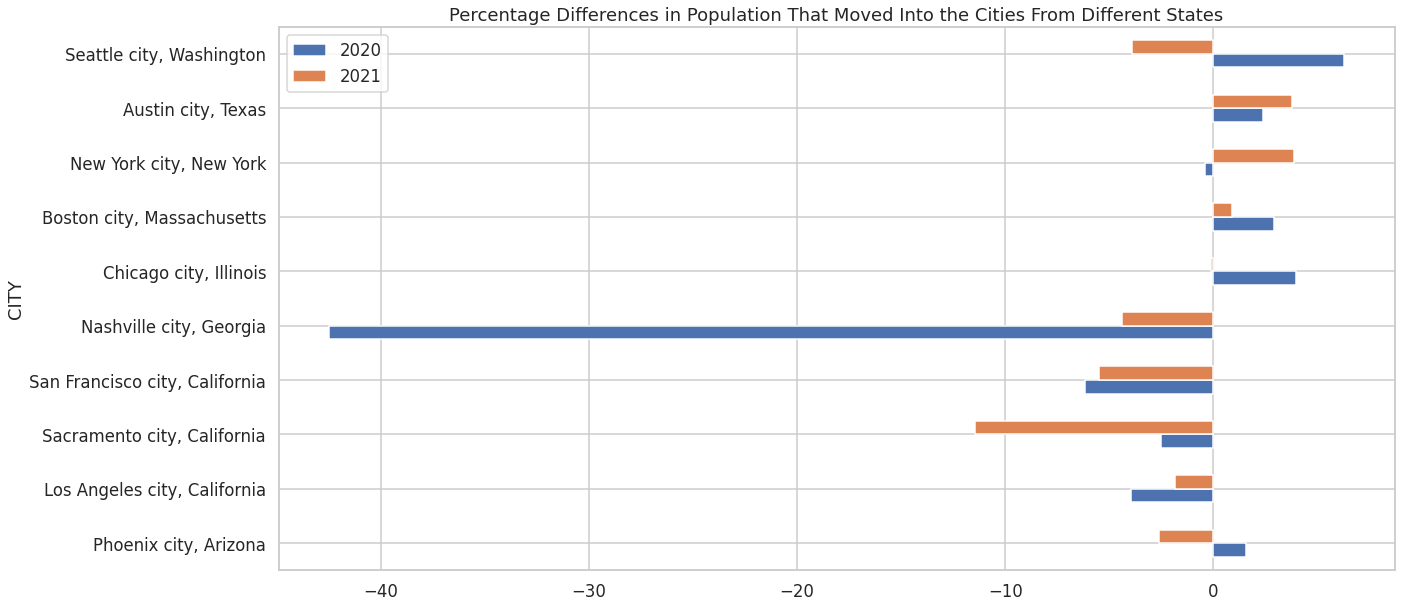

In [ ]:
#Plotting the percentage differences to make extra analysis
mobility.plot.barh(xlabel='CITY', ylabel= 'Percentage difference',figsize=(20,10))
plt.title('Percentage Differences in Population That Moved Into the Cities From Different States')

**Population Shift Based on the Number of People That Moved Into The Cities From Different States**
Nashville had the lowest number of people moving into the city form different states. From the plot it was noticed there was a huge drop of 42.48% in 2020 and a further 4.36% in 2021. Cities that had a increase in the number of people who moved into them from different states in 2020 but droped in 2021 are Los Angeles, Sacramento and San Francisco. New York City had a drop of 0.39% in 2020 but had a rise on 3.86% in 2021. Seattle had the highest percentage increase of 6.27% and Nashville had the highest percentage drop of 42.48% in 2020. New York city had the highest percentage increase of 3.86% and Sacramento had the highest percentage drop of 11.47% in 2021. 




### 4.   How have the average single family home, and apartment rent prices changed over time? 

In [ ]:
onebd = hud_df.query("Bedrooms=='1' and Growth=='YoY'" )
onebd["Year"] = onebd["Year"].dt.strftime("%Y")
cities = sorted(onebd['City'].unique().tolist()) 

In [ ]:
fig = px.line(onebd, 
              x="Year",
              y="Percent Change", 
              color="City", 
              custom_data=["Price Change"], 
              category_orders={"City":cities},
              labels={"Percent Change":"Year-Over-Year"},
              template= 'ygridoff'
              )

fig.update_traces(
    mode="markers+lines", 
    hovertemplate=None
)

fig.update_xaxes(dtick=1)

fig.update_layout(
    title=dict(
        text="Year-over-year change in average monthly rent for 1-Bedroom apartments",
        x=0.5,
        y=0.95,
        xanchor="center",
        yanchor="top"
    ),
    yaxis_ticksuffix="%",
    hovermode='x unified')

fig.show()

##### *Rents Declined in 3 Major U.S. Metro Areas during COVID-19 Pandemic*

Seattle, experienced the largest year-over-year (YOY) drop in rent for a one bedroom apartment at the start of the COVID-19 pandemic, where the average monthly rent fell 8.16%. San Francisco and Los Angeles saw the largest drop in rent at the height of pandemic with prices falling 9.99% and 0.06% respectively. Although rent in other metro areas did not drop, they did however experience the slowest growth from 2019 to 2021. New York saw the most signficant YOY drop from 2021 to 2022 with growth dropping from 14.05% in 2021 to 5.65% in 2022, however in Phoenix, rent jumped 34.46% YOY, exceeding pre-pandemic growth (10.37%).

In [ ]:
onebd22 = onebd.query("Bedrooms=='1' and Year=='2022'")

fig = px.scatter_mapbox(onebd22, 
                        lat="lat", 
                        lon="lon",
                        custom_data=["City", "State", "Year","Price Change", 
                                     "Avg Rent", "Percent Change"],
                        zoom=4, 
                        color="Percent Change",
                        size="Avg Rent",
                        width=1250,
                        height=800,
                        title="Year-over-year change in median monthy apartment rent for one bedroom apartments from 2021 to 2022"
                        )

fig.update_traces(hovertemplate=
                  "<b>%{customdata[0]}</b><br><br>" +
                  "State: %{customdata[1]}<br>" +
                  "Year: %{customdata[2]}<br>" +
                  "Median Rent: %{customdata[4]:$,.0f}<br>" +
                  "Difference: %{customdata[3]:$,.0f}<br>" +
                  "YoY: %{customdata[5]}%<br>" +
                  "<extra></extra>"
                  )


fig.update_layout(
    title=dict(x=0.2),
    coloraxis_colorbar=dict(
        title="YoY",
        titleside="right",
        ticksuffix="%",
        orientation="h",
        lenmode="pixels",
        len=600,
    ),
    coloraxis_colorbar_x=0.3
)

fig.update_layout(mapbox_style="open-street-map", 
                  mapbox_center={"lat": 37.0902, "lon": -95.7129})
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0}) 
fig.update_layout(mapbox_bounds={"west": -180, "east": -50, 
                                 "south": 20, "north": 90})

                  

fig.show()

##### *Rent Increased The Most In Cities with the Lowest Monthly Rent*

Phoenix, had the highest growth in rent for one bedroom apartments in 2022, where rent jumped 34.46% YOY. It also had the third lowest median rent, \$1,467, after Nashville (\$1,245) and Austin (\$1,386) which experienced the second (13.18%) and third (12.14) highest growth respectively.


San Francisco experienced the slowest growth, with rent only growing 1.25%, which also had the highest monthly rent ($2,665). New York had the second lowest growth (5.65%) and the third highest median rent (\$2,170) followed by Boston, which had third lowest growth (10.67%) and second highest median rent (\$2,198).

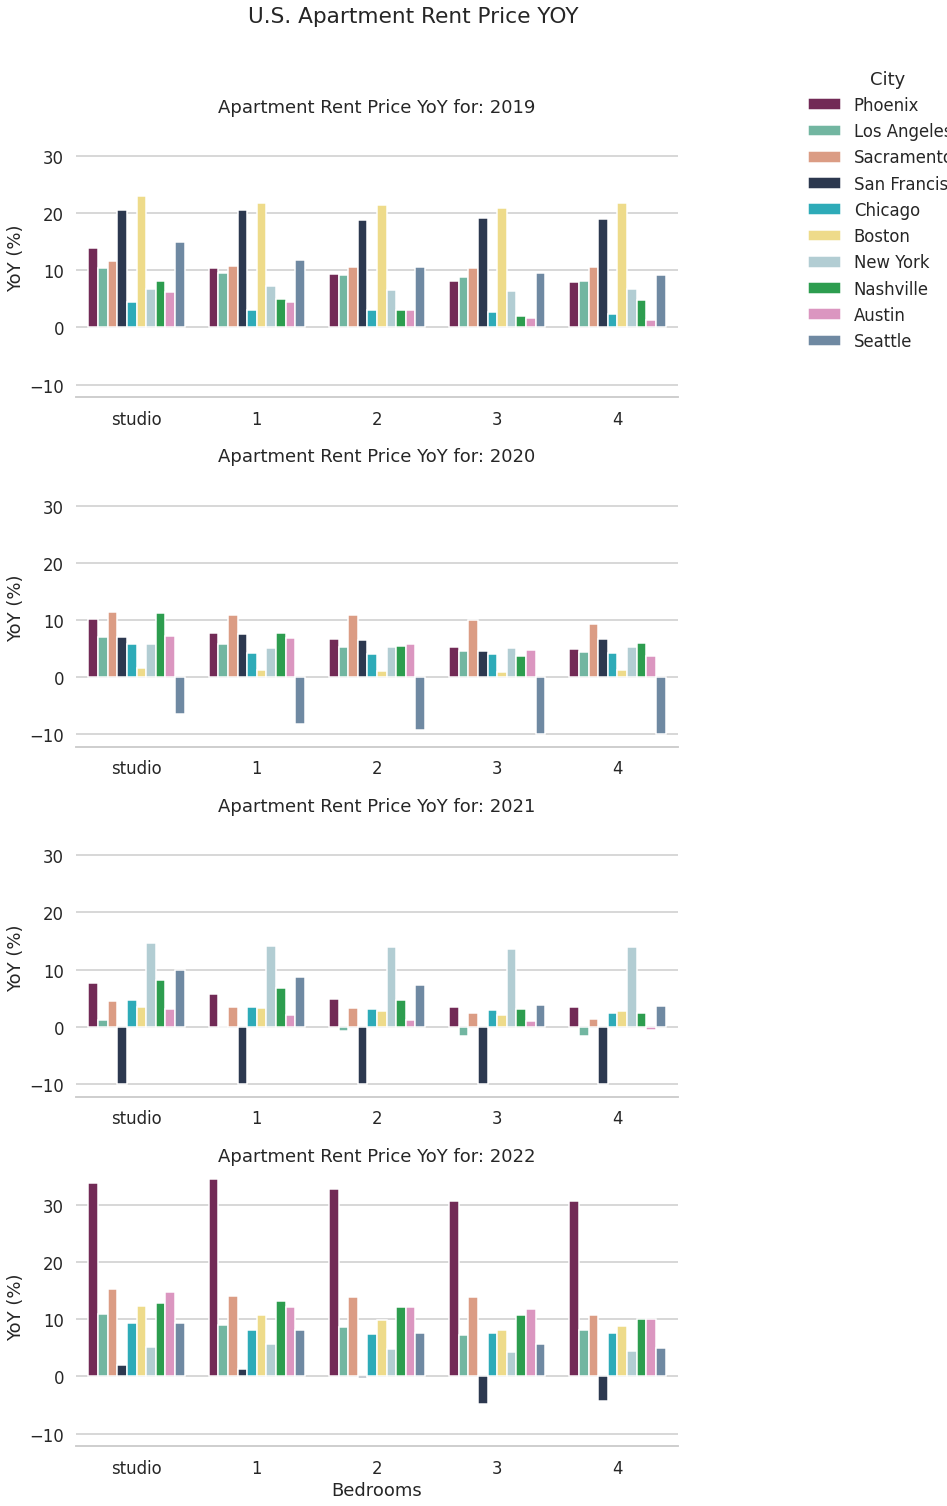

In [ ]:
colors = ["#7e1e59","#66c2a5","#ea9675","#263655","#17becf","#ffe579","#add0d8","#1ab048","#e78ac3","#668aaa"]
sns.set_palette(sns.color_palette(colors))

f = sns.catplot(data=yearly_df, x ='Bedrooms', y='YoY', kind='bar', col = 'Year', hue ='City',
            col_wrap= 1, sharex = False, height=5, aspect = 2)

f.despine(left=True)
f.fig.suptitle("U.S. Apartment Rent Price YOY", y=1.05)
f.set_titles("Apartment Rent Price YoY for: {col_name}")
f.set_axis_labels('Bedrooms','YoY (%)')
f.set_xticklabels(rotation = 'horizontal')
sns.move_legend(f, "center right",frameon=False, bbox_to_anchor = (1.1,0.9))

plt.show()

####Description of Key Findings for HUD dataset
##### Before the pandemic, from 2018 to 2019, rental price changes across bedroom types were approximately 5-23% for each of the top 10 cities selected for analysis; Boston had the highest price change and Chicago had the lowest price change. As the pandemic began, from 2019 to 2020, the price changes ranged from approximately –10% for Seattle, across all bedroom types, to approximately 11% for Sacramento. As the pandemic progressed from 2020 to 2021, the price changes declined significantly for Sacramento with a 10% decline. Additionally, Los Angeles experienced the second highest rent price decrease with an approximately –1% decline across all bedroom types which implies that it may have experienced a population decline resulting in a decrease in demand for rentals. From 2021 to 2022, Phoenix showed an over 30% increase in its rental price change, across all bedroom types, which suggests that there may have been a large increase in the population of residents seeking rental units which drove up the prices. In addition, San Francisco continued its decline in the 2-4 bedroom type category which hints at the possibility that larger families moved out of San Francisco leading to a decrease in rental prices for the 2-4 bedroom category. 


### 5.   Has the inflation rate affected housing inventory? 

### 6.   How has the cost of consumer goods changed? 

Inflation rates are calculated using the Consumer Price Index (CPI)measures for the period of 2019-2022 (non-seasonaly adjusted). The CPI measures utilized, include the changes in prices paid by consumers for goods and services and reflects spending patterns for all urban consumers. The all urban consumer group represents about 93 percent of the total U.S. population.

The rates for consumer spending are based on prices of food, clothing, housing, fuels, transportation, healthcare, and other goods and services that people buy for day-to-day living.
Prior to the pandemic (2019 thru early 2020), most of the cities in our sample reflected decreases in annual inflation rates (except for Sacramento which reflected a steady increase in the cost of goods and services). As a result of the impacts on the economy due to the pandemic, the cost of consumer goods and services increased steadily each year, reaching its highest peak thus far in 2022. 
Phoenix, Arizona showed the highest increase in inflation. Prior to the pandemic the annual inflation rate for Phoenix was 2.9%. By December 2022 it had grown to 11.5%, an increase of over 8.6%. This rate is higher than the United States average of 8%. Austin, Texas reflected the 2nd highest inflation rate of our selected cities, going from 1.4% pre-pandemic to 8,6% post pandemic. Most other cities in our population kept pace at or below the US average of 8% from 2019-2022, except for Seattle which landed at 9% and Austin and Nashville which were both 8.6% post-pandemic. Chicago reflected the lowest rate of inflation overall, landing at 4.2% post-pandemic.


In [ ]:

inflation_df.dropna(axis=1, inplace=True)


In [ ]:
fig = px.line(inflation_df, 
              x="Year",
              y="Annual Inflation", 
              color="City", 
              template= 'ygridoff'
              )

fig.update_traces(
    mode="markers+lines", 
    hovertemplate=None
)

fig.update_xaxes(dtick=1)

fig.update_layout(
    title=dict(
        text="Annual Inflation by City vs US",
        x=0.5,
        y=0.95,
        xanchor="center",
        yanchor="top"
    ),
    yaxis_ticksuffix="%",
    hovermode='x unified')

fig.show()

### 7.   Has the inflation rate affected housing inventory? (Askek)

#### Data Processing

In [13]:
target_cities = ['New York, NY', 'Chicago, IL', 'Boston, MA', 'Seattle, WA', 'San Francisco, CA', 'Sacramento, CA', 'Austin, TX', 'Los Angeles, CA', 'Nashville, TN', 'Phoenix, AZ']

In [21]:
inventory = df_iv[df_iv.RegionName.isin(target_cities)]

There are two null values for Nashville, TN

In [22]:
inventory[inventory.isnull().any(axis=1)]

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
36,394902,36,"Nashville, TN",msa,TN,6402.0,6597.0,7513.0,8153.0,8756.0,...,3419.0,4089.0,4792.0,5545.0,6571.0,7495.0,7830.0,7742.0,7744.0,7163.0


In [23]:
average_2021_inventory = (inventory.loc[36,'2021-01-31'] + inventory.loc[36,'2021-04-30'] + inventory.loc[36,'2021-05-31'] + inventory.loc[36,'2021-06-30'] + inventory.loc[36,'2021-07-31'] + inventory.loc[36,'2021-08-31'] + inventory.loc[36,'2021-09-30'] + inventory.loc[36,'2021-10-31'] + inventory.loc[36,'2021-11-30'] + inventory.loc[36,'2021-12-31'])/10

In [24]:
inventory.loc[36,'2021-02-28'] = average_2021_inventory
inventory.loc[36,'2021-03-31'] = average_2021_inventory

In [25]:
inventory

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
1,394913,1,"New York, NY",msa,NY,66530.0,74575.0,80016.0,86445.0,91131.0,...,42563.0,48488.0,50278.0,54828.0,57774.0,57781.0,55530.0,55297.0,52890.0,48361.0
2,753899,2,"Los Angeles, CA",msa,CA,19893.0,21994.0,24106.0,25253.0,27455.0,...,13916.0,15848.0,16511.0,18495.0,20270.0,21782.0,22018.0,20697.0,20120.0,18273.0
3,394463,3,"Chicago, IL",msa,IL,34633.0,37046.0,44063.0,45649.0,47560.0,...,21130.0,24765.0,26083.0,28480.0,30780.0,31504.0,31121.0,29720.0,28587.0,24954.0
10,394976,10,"Phoenix, AZ",msa,AZ,25768.0,26865.0,28519.0,28333.0,27669.0,...,14058.0,15182.0,16057.0,18350.0,21274.0,23816.0,25343.0,25104.0,25025.0,23087.0
11,394404,11,"Boston, MA",msa,MA,7993.0,8777.0,10432.0,12821.0,15297.0,...,5614.0,8202.0,9292.0,10982.0,13248.0,10684.0,10018.0,10396.0,10219.0,8594.0
12,395057,12,"San Francisco, CA",msa,CA,4111.0,5277.0,6589.0,7224.0,8162.0,...,5659.0,7189.0,7643.0,8389.0,9215.0,9534.0,9152.0,8848.0,8555.0,6974.0
15,395078,15,"Seattle, WA",msa,WA,6630.0,6640.0,8592.0,9599.0,12253.0,...,5186.0,7356.0,8297.0,9990.0,11461.0,12432.0,11930.0,11187.0,10215.0,8330.0
26,395045,26,"Sacramento, CA",msa,CA,5518.0,5822.0,6791.0,7421.0,8460.0,...,3918.0,4804.0,5366.0,6271.0,6875.0,7599.0,7779.0,7164.0,6685.0,5713.0
29,394355,29,"Austin, TX",msa,TX,6704.0,7149.0,8322.0,9361.0,10047.0,...,5067.0,6246.0,7536.0,9256.0,11359.0,12535.0,12785.0,12509.0,11986.0,10755.0
36,394902,36,"Nashville, TN",msa,TN,6402.0,6597.0,7513.0,8153.0,8756.0,...,3419.0,4089.0,4792.0,5545.0,6571.0,7495.0,7830.0,7742.0,7744.0,7163.0


#### Feature Engineering

We will create new columns for the total yearly available inventory for each city.

In [26]:
inventory['2019'] = inventory['2019-01-31'] + inventory['2019-02-28'] + inventory['2019-03-31'] + inventory['2019-04-30'] + inventory['2019-05-31'] + inventory['2019-06-30'] + inventory['2019-07-31'] + inventory['2019-08-31'] + inventory['2019-09-30'] + inventory['2019-10-31'] + inventory['2019-11-30'] + inventory['2019-12-31']
inventory['2020'] = inventory['2020-01-31'] + inventory['2020-02-29'] + inventory['2020-03-31'] + inventory['2020-04-30'] + inventory['2020-05-31'] + inventory['2020-06-30'] + inventory['2020-07-31'] + inventory['2020-08-31'] + inventory['2020-09-30'] + inventory['2020-10-31'] + inventory['2020-11-30'] + inventory['2020-12-31']
inventory['2021'] = inventory['2021-01-31'] + inventory['2019-02-28'] + inventory['2019-03-31'] + inventory['2021-04-30'] + inventory['2021-05-31'] + inventory['2021-06-30'] + inventory['2021-07-31'] + inventory['2021-08-31'] + inventory['2021-09-30'] + inventory['2021-10-31'] + inventory['2021-11-30'] + inventory['2021-12-31']

In [31]:
df_inventory = inventory[['RegionName','2019', '2020', '2021']].sort_values('RegionName')
df_inventory

,RegionName,2019,2020,2021
29,"Austin, TX",106149.0,84909.0,96489.0
11,"Boston, MA",168782.0,134717.0,124184.0
3,"Chicago, IL",555309.0,467283.0,432121.0
2,"Los Angeles, CA",339261.0,272180.0,249626.0
36,"Nashville, TN",112912.0,96715.0,68186.0
1,"New York, NY",1044733.0,894191.0,790992.0
10,"Phoenix, AZ",288366.0,233425.0,223355.0
26,"Sacramento, CA",92896.0,71413.0,65852.0
12,"San Francisco, CA",95712.0,90071.0,89644.0
15,"Seattle, WA",129015.0,101765.0,100511.0


In [30]:
df_inflation = df_infc[['City','2019', '2020', '2021']].sort_values('City')
df_inflation

,City,2019,2020,2021
0,"Austin, TX",1.4,1.0,5.1
1,"Boston, MA",1.9,1.1,3.3
2,"Chicago, IL",1.8,1.5,1.1
3,"Los Angeles, CA",7.6,1.6,3.8
4,"Nashville, TN",3.5,1.0,3.7
5,"New York, NY",1.7,1.7,3.3
6,"Phoenix, AZ",2.9,2.0,5.0
8,"Sacramento, CA",2.7,4.2,4.5
7,"San Francisco, CA",3.3,1.7,3.2
9,"Seattle, WA",2.5,1.7,4.6


#### Correlation between inflation rate and housing inventory

In [33]:
# We combine the two dataframes in a single one
combo = pd.merge(df_inflation,df_inventory, left_on = 'City', right_on = 'RegionName', suffixes = ['_inflation', '_inventory']).set_index('City').drop('RegionName', axis = 1).reset_index()
combo

,City,2019_inflation,2020_inflation,2021_inflation,2019_inventory,2020_inventory,2021_inventory
0,"Austin, TX",1.4,1.0,5.1,106149.0,84909.0,96489.0
1,"Boston, MA",1.9,1.1,3.3,168782.0,134717.0,124184.0
2,"Chicago, IL",1.8,1.5,1.1,555309.0,467283.0,432121.0
3,"Los Angeles, CA",7.6,1.6,3.8,339261.0,272180.0,249626.0
4,"Nashville, TN",3.5,1.0,3.7,112912.0,96715.0,68186.0
5,"New York, NY",1.7,1.7,3.3,1044733.0,894191.0,790992.0
6,"Phoenix, AZ",2.9,2.0,5.0,288366.0,233425.0,223355.0
7,"Sacramento, CA",2.7,4.2,4.5,92896.0,71413.0,65852.0
8,"San Francisco, CA",3.3,1.7,3.2,95712.0,90071.0,89644.0
9,"Seattle, WA",2.5,1.7,4.6,129015.0,101765.0,100511.0


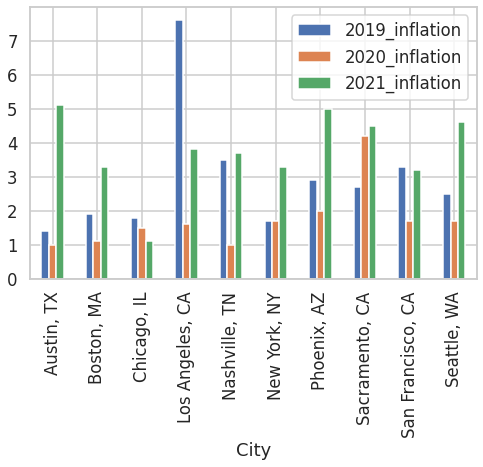

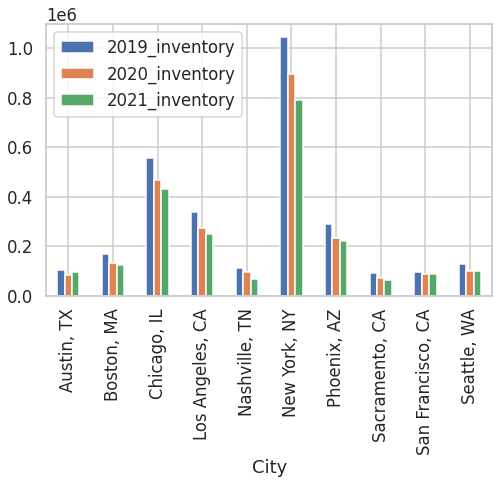

In [34]:
# We plot both the inflation and inventory by city
combo.plot(x='City', y = ['2019_inflation', '2020_inflation', '2021_inflation'], kind='bar', figsize=(8,5))
combo.plot(x='City', y = ['2019_inventory', '2020_inventory', '2021_inventory'], kind='bar', figsize=(8,5))

The single house inventory has been decreasing between 2019 and 2021 while the inflation rate has mostly been increasing over the timespan. We conclude there seems to be a limited negative corelation here between the inflation and the single house inventory.